In [9]:
pip install networkx matplotlib scikit-learn numpy pandas

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
pontos = ["Empresa", "Cliente 31", "Cliente 90", "Cliente 280", "Cliente 19", "Cliente 50"]
G.add_nodes_from(pontos)

arestas = [
    ("Empresa", "Cliente 31", 15),
    ("Empresa", "Cliente 90", 5),
    ("Empresa", "Cliente 280", 20),
    ("Empresa", "Cliente 19", 40),
    ("Empresa", "Cliente 50", 30),
]
for u,v,w in arestas:
    G.add_edge(u,v,weight=w)

pos = nx.spring_layout(G,seed=30)

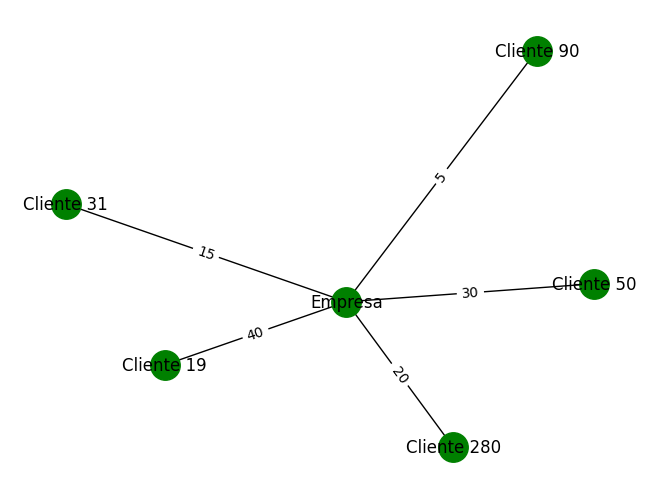

In [3]:
pos = nx.spring_layout(G,seed=15)
nx.draw(G, pos, with_labels=True, node_size=450, node_color="green", font_size=12)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

In [4]:
rota = nx.shortest_path(G, source="Empresa", target="Cliente 19", weight="weight")
distancia = nx.shortest_path_length(G, source="Empresa", target="Cliente 19", weight="weight")
print("Rota:", rota)
print("Distância em minutos:", distancia)

Rota: ['Empresa', 'Cliente 19']
Distância em minutos: 40


In [5]:
G["Empresa"]["Cliente 19"]["weight"] = 12

rota = nx.shortest_path(G, source="Empresa", target="Cliente 19", weight="weight")
distancia = nx.shortest_path_length(G, source="Empresa", target="Cliente 19", weight="weight")
print("Nova rota:", rota)
print("Distância em minutos:", distancia, "minutos")

Nova rota: ['Empresa', 'Cliente 19']
Distância em minutos: 12 minutos


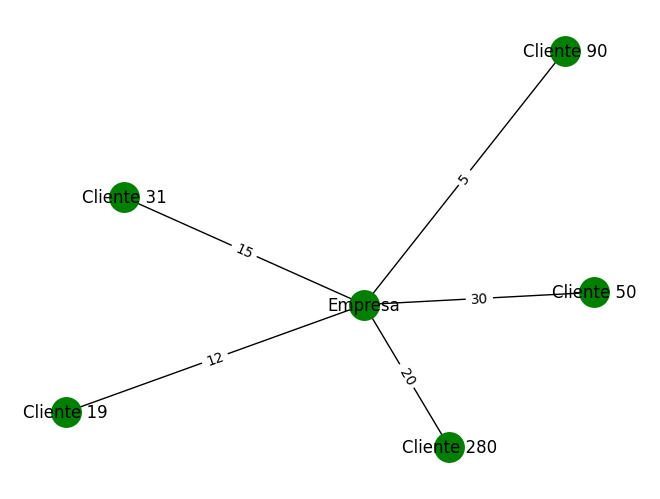

In [6]:
pos = nx.spring_layout(G,seed=15)
nx.draw(G, pos, with_labels=True, node_size=450, node_color="green", font_size=12)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

Nova rota: ['Empresa', 'Cliente 50']
Distância em minutos: 8 minutos


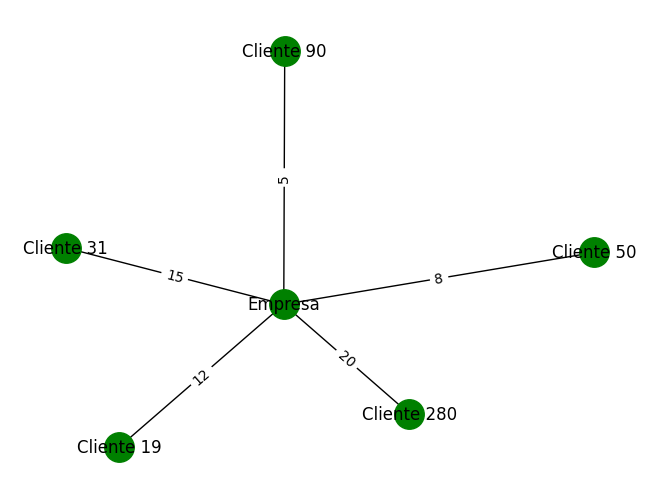

In [7]:
G["Empresa"]["Cliente 50"]["weight"] = 8

rota = nx.shortest_path(G, source="Empresa", target="Cliente 50", weight="weight")
distancia = nx.shortest_path_length(G, source="Empresa", target="Cliente 50", weight="weight")
print("Nova rota:", rota)
print("Distância em minutos:", distancia, "minutos")

pos = nx.spring_layout(G,seed=15)
nx.draw(G, pos, with_labels=True, node_size=450, node_color="green", font_size=12)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

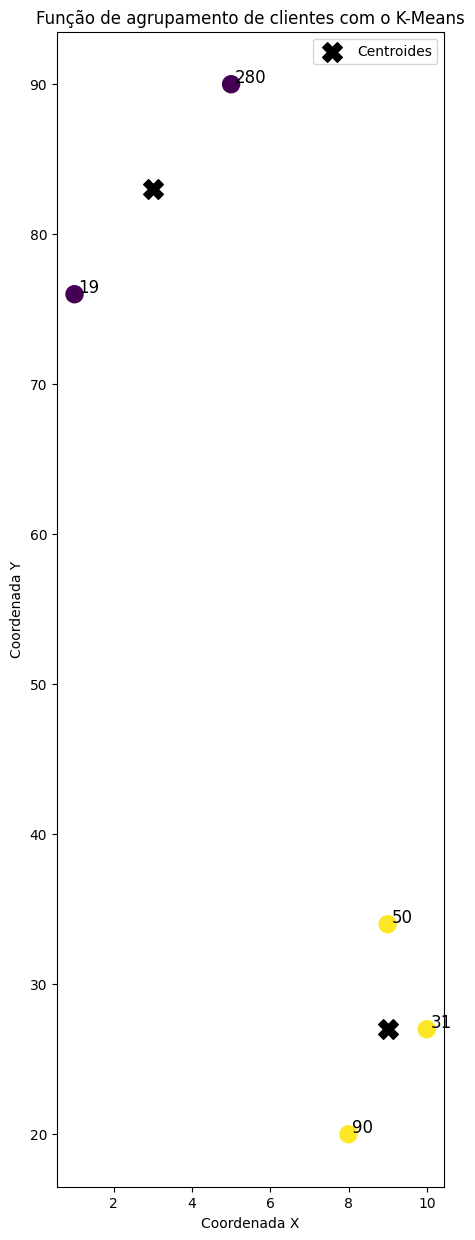

Cliente 31 está no grupo: 1
Cliente 90 está no grupo: 1
Cliente 280 está no grupo: 0
Cliente 19 está no grupo: 0
Cliente 50 está no grupo: 1


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

coords = np.array([
    [10, 27],
    [8,20],
    [5,90],
    [1,76],
    [9,34],
])

kmeans = KMeans(n_clusters=2, random_state=50).fit(coords)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(5,15))
plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='viridis', s=150)

for i, cliente in enumerate([31, 90, 280, 19, 50]):
    plt.text(coords[i,0]+0.1, coords[i,1]+0.1, f"{cliente}", fontsize=12)

plt.scatter(centers[:,0], centers[:, 1], c='black', marker="X", s=200, label="Centroides")

plt.title("Função de agrupamento de clientes com o K-Means")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.legend()
plt.show()

for i, cliente in enumerate([31, 90, 280, 19, 50]):
    print(f"Cliente", cliente, "está no grupo:", labels[i])

plt.show()